# Context Managers (__enter__, __exit__)

https://docs.python.org/3/reference/datamodel.html#with-statement-context-managers

In [1]:
# WAY 1
f = open("file.txt", "w")
f.write("hello")
# WHAT IF I CRASH HERE?
f.write("hello")
f.close()

In [2]:
# WAY 2 (preferred)
with open("file.txt", "w") as f:
    f.write("hello")
    # WHAT IF I CRASH HERE?
    f.write("hello")


In [3]:
import matplotlib
from matplotlib import pyplot as plt

In [4]:
matplotlib.rcParams["font.size"]

10.0

AssertionError: 

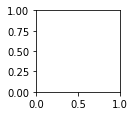

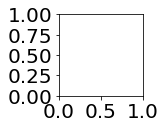

In [5]:
class MultFont:
    def __init__(self, mult):
        self.mult = mult
    
    def __enter__(self):
        self.prior_size = matplotlib.rcParams["font.size"]
        matplotlib.rcParams["font.size"] *= self.mult
        
    def __exit__(self, exc_type, exc_value, traceback):
        matplotlib.rcParams["font.size"] = self.prior_size

plt.subplots(figsize=(1.5,1.5))
with MultFont(2):
    plt.subplots(figsize=(1.5,1.5))
    assert 1 == 2
    plt.subplots(figsize=(1.5,1.5))

(<Figure size 108x108 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f82686c6dd8>)

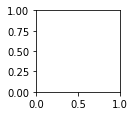

In [6]:
plt.subplots(figsize=(1.5,1.5))

# Inheritance

In [7]:
class NamedAnimal:
    def __init__(self, name):
        self.name = name
    
    def __str__(self):
        return "{} {}".format(type(self).__name__, self.name)

    def __repr__(self):
        return "{}('{}')".format(type(self).__name__, self.name)

class Dog(NamedAnimal):
    def __init__(self, name, age):
        # step 1: manually call parent init
        NamedAnimal.__init__(self, name) 
        # step 2: do our own additional init
        self.age = age
    
    def speak(self):
        print("bark")
    
class Cat(NamedAnimal):
    def speak(self):
        print("bark")
        
    def __str__(self):
        return NamedAnimal.__str__(self) + ", string expert"

c = Cat("Kevin")
print(c)
d = Dog("Sam", 1)
print(d)

Cat Kevin, string expert
Dog Sam


# ABC's

https://docs.python.org/3/library/collections.abc.html#collections-abstract-base-classes

In [8]:
class Range:
    def __init__(self, bound1, bound2=None):
        if bound2 != None:
            self.lower = bound1
            self.upper = bound2
        else:
            self.lower = 0
            self.upper = bound1
            
    def __len__(self):
        return self.upper - self.lower
            
    def __getitem__(self, lookup):
        if not isinstance(lookup, int):
            raise NotImplementedError("slices not supported")
        if lookup < 0:
            raise NotImplementedError("negative not supported")
        if lookup >= len(self):
            raise IndexError("out of bounds")
        return self.lower + lookup